<a href="https://colab.research.google.com/github/KrishnamurthyKeerthana/socialMediaDataMiningProject/blob/test/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install matplotlib

In [7]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Enter your Twitter API credentials
consumer_key = "8fCwS4vvt36KSSqz4xMnaKi5A"
consumer_secret = "WoXsMs9ZMUcgHMHibSNUXcFgj6c51xfBKju9yBwnCkR8qfowHz"
access_token = "1243483298711527424-0yTRvsILfSJS7EFGJuGT4khY9U1skd"
access_token_secret = "eAdKTKgDD13rMbbdxjBp0l0KEKiQD0zSH98QLsjOcZ1hA"

# authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# search terms
search_words = ['Apple', 'Samsung', 'Google Pixel']
#, 'Samsung', 'Google Pixel']

# geocodes for New York and Atlanta
geocodes = {'New York': '40.7128,-74.0060,10km', 'Atlanta': '33.7490,-84.3880,10km'}

# search for tweets containing each search term in each location
results = {}
for brand in search_words:
    for location, geocode in geocodes.items():
        query = brand + ' -filter:retweets'
        tweets = tweepy.Cursor(api.search_tweets, q=query, geocode=geocode).items(100)
        results[brand + ' - ' + location] = [{'text': tweet.text, 'location': location} for tweet in tweets]
        # save the results to a CSV file
        pd.DataFrame(results[brand + ' - ' + location]).to_csv(f'{brand}_{location}.csv', index=False)


# create a Pandas dataframe to hold the results
df = pd.DataFrame(columns=['brand', 'location', 'sentiment'])

Location: New York
Apple - Positive tweets: 1908, Negative tweets: 4692
Samsung - Positive tweets: 5760, Negative tweets: 12246
Google Pixel - Positive tweets: 3996, Negative tweets: 8484
Location: Atlanta
Apple - Positive tweets: 2220, Negative tweets: 10380
Samsung - Positive tweets: 6042, Negative tweets: 11004
Google Pixel - Positive tweets: 4806, Negative tweets: 9576


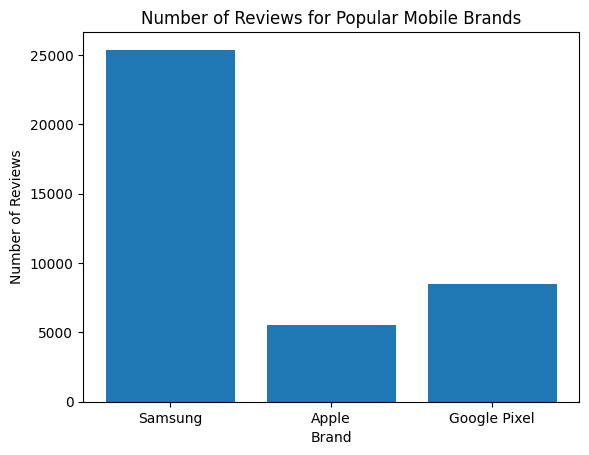

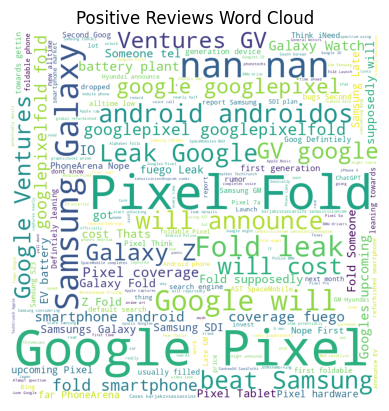

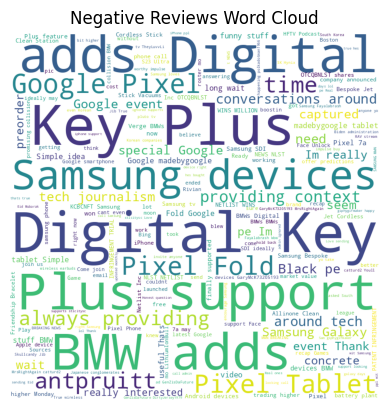

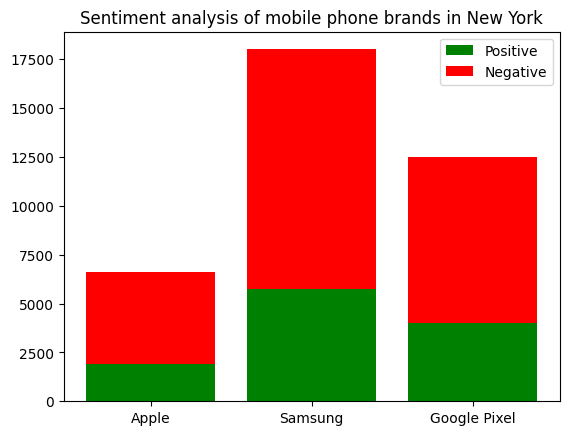

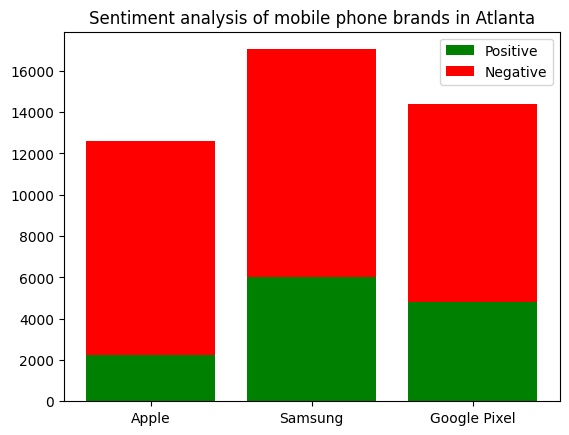

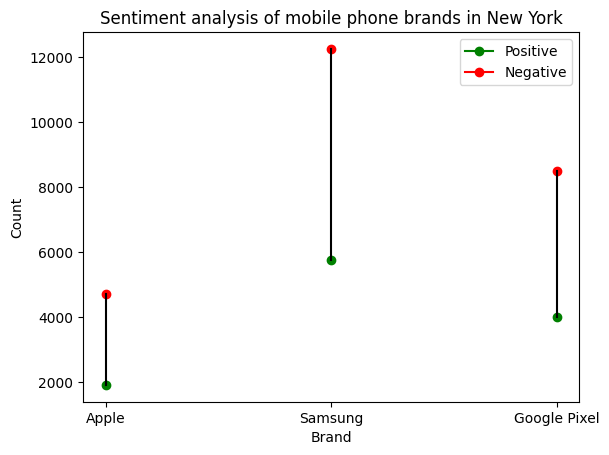

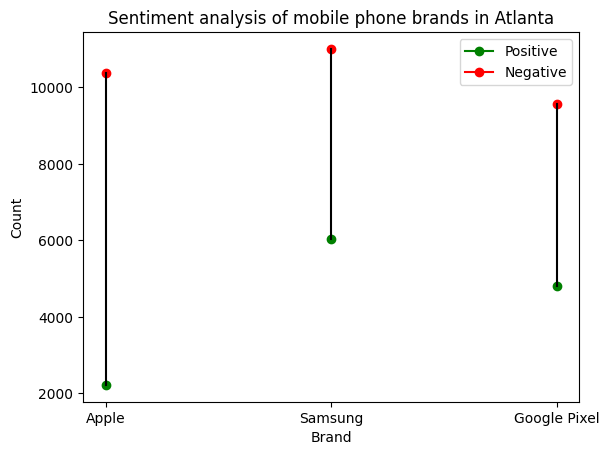

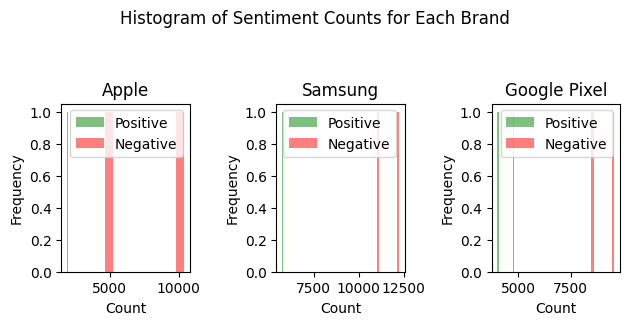

In [21]:

# perform sentiment analysis on the tweets
sia = SentimentIntensityAnalyzer()
for brand in search_words:
    for location in geocodes.keys():
        # read the results from the CSV file
        tweets = pd.read_csv(f'{brand}_{location}.csv')
        for index, tweet in tweets.iterrows():
            # clean up the tweet text
            clean_text = re.sub(r'http\S+', '', tweet['text'])
            clean_text = re.sub('[^a-zA-Z0-9\s]', '', clean_text)
            # perform sentiment analysis
            score = sia.polarity_scores(clean_text)
            sentiment = 'positive' if score['pos'] > score['neg'] else 'negative'
            # add the result to the dataframe
            df = pd.concat([df, pd.DataFrame({'brand': brand, 'location': tweet['location'], 'sentiment': sentiment,'clean_text': clean_text}, index=[0])], ignore_index=True)

# count the number of positive and negative tweets for each brand and location
counts = df.groupby(['brand', 'location', 'sentiment']).size().reset_index(name='count')

# print the results
for location, geocode in geocodes.items():
    print(f"Location: {location}")
    for brand in search_words:
        count = counts[(counts['brand'] == brand) & (counts['location'] == location)]
        pos_count = count[count['sentiment'] == 'positive']['count'].values[0] if len(count[count['sentiment'] == 'positive']) > 0 else 0
        neg_count = count[count['sentiment'] == 'negative']['count'].values[0] if len(count[count['sentiment'] == 'negative']) > 0 else 0
        print(f"{brand} - Positive tweets: {pos_count}, Negative tweets: {neg_count}")

# save the results to a CSV file
#counts.to_csv('output1.csv', index=False)
df.to_csv('SentimentScore.csv', index=False)

# print the results
#print(counts)

# load the dataset
df = pd.read_csv('/content/SentimentScore.csv')

# convert the 'review' column to string type
df['clean_text'] = df['clean_text'].astype(str)

# create a list of popular mobile brands
brands = ['Samsung', 'Apple', 'Google Pixel']

# create a dictionary to store brand counts
brand_counts = {}

# count the number of reviews for each brand
for brand in brands:
    brand_counts[brand] = df['clean_text'].str.count(brand).sum()

# create a bar chart of the brand counts
plt.bar(brand_counts.keys(), brand_counts.values())
plt.title('Number of Reviews for Popular Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.show()

# create a positive word cloud
positive_reviews = ' '.join(df[df['sentiment'] == "negative"]['clean_text'])
positive_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_reviews)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# create a negative word cloud
negative_reviews = ' '.join(df[df['sentiment'] == "positive"]['clean_text'])
negative_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_reviews)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

# plot the results as a bar chart
for location, geocode in geocodes.items():
    plt.figure()
    plt.title(f"Sentiment analysis of mobile phone brands in {location}")
    for brand in search_words:
        count = counts[(counts['brand'] == brand) & (counts['location'] == location)]
        pos_count = count[count['sentiment'] == 'positive']['count'].values[0] if len(count[count['sentiment'] == 'positive']) > 0 else 0
        neg_count = count[count['sentiment'] == 'negative']['count'].values[0] if len(count[count['sentiment'] == 'negative']) > 0 else 0
        plt.bar(brand, pos_count, color='green')
        plt.bar(brand, neg_count, color='red', bottom=pos_count)
        plt.legend(['Positive', 'Negative'])
    plt.show()

# plot the results as a line chart
for location, geocode in geocodes.items():
    plt.figure()
    plt.title(f"Sentiment analysis of mobile phone brands in {location}")
    for brand in search_words:
        count = counts[(counts['brand'] == brand) & (counts['location'] == location)]
        pos_count = count[count['sentiment'] == 'positive']['count'].values[0] if len(count[count['sentiment'] == 'positive']) > 0 else 0
        neg_count = count[count['sentiment'] == 'negative']['count'].values[0] if len(count[count['sentiment'] == 'negative']) > 0 else 0
        plt.plot([brand], [pos_count], marker='o', color='green')
        plt.plot([brand], [neg_count], marker='o', color='red')
        plt.plot([brand, brand], [pos_count, neg_count], color='black')
        plt.legend(['Positive', 'Negative'])
    plt.xticks(search_words)
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.show()

# Plot histogram of sentiment counts for each brand
plt.figure()
plt.suptitle('Histogram of Sentiment Counts for Each Brand', y=1.05)
for i, brand in enumerate(search_words):
    pos_counts = counts[(counts['brand'] == brand) & (counts['sentiment'] == 'positive')]['count']
    neg_counts = counts[(counts['brand'] == brand) & (counts['sentiment'] == 'negative')]['count']
    plt.subplot(2, 3, i+1)
    plt.hist(pos_counts, color='green', alpha=0.5)
    plt.hist(neg_counts, color='red', alpha=0.5)
    plt.title(brand)
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.legend(['Positive', 'Negative'])
plt.tight_layout()
plt.show()
